In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('master.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### Which generation has the highest number of suicide rates ?

In [5]:
data.groupby('age').mean()[['suicides/100k pop']].sort_values(by = 'suicides/100k pop', ascending = False)

,suicides/100k pop
age,
75+ years,23.955409
55-74 years,16.155579
35-54 years,14.947441
25-34 years,12.186885
15-24 years,8.947154
5-14 years,0.620041


### Which country has the highest number of suicide rates combined ?

In [6]:
age = data['age'].unique()
for a in age:
    print('Suicide Rate : {} old category'.format(a))
    print(data[data['age'] == a].groupby(['country']).sum()['suicides/100k pop'].sort_values(ascending = False)[:3])
    print()

Suicide Rate : 15-24 years old category
country
Russian Federation    1368.26
Kazakhstan            1304.36
Guyana                1224.28
Name: suicides/100k pop, dtype: float64

Suicide Rate : 35-54 years old category
country
Lithuania             2696.75
Russian Federation    2378.83
Hungary               2113.02
Name: suicides/100k pop, dtype: float64

Suicide Rate : 75+ years old category
country
Republic of Korea    4294.26
Hungary              4247.02
Austria              3848.07
Name: suicides/100k pop, dtype: float64

Suicide Rate : 25-34 years old category
country
Russian Federation    2114.97
Kazakhstan            1896.83
Lithuania             1745.96
Name: suicides/100k pop, dtype: float64

Suicide Rate : 55-74 years old category
country
Lithuania             2496.04
Russian Federation    2321.51
Hungary               2292.21
Name: suicides/100k pop, dtype: float64

Suicide Rate : 5-14 years old category
country
Kazakhstan    135.51
Suriname      129.60
Guyana        100.32


### Simplifying GDP Calculation

In [7]:
data['easy_gdp_cal'] = round(data['gdp_per_capita ($)']/(len(data['age'].unique() * 2)))

### Singapore : Does higher economics achievement of the country reduce suicide rate ?

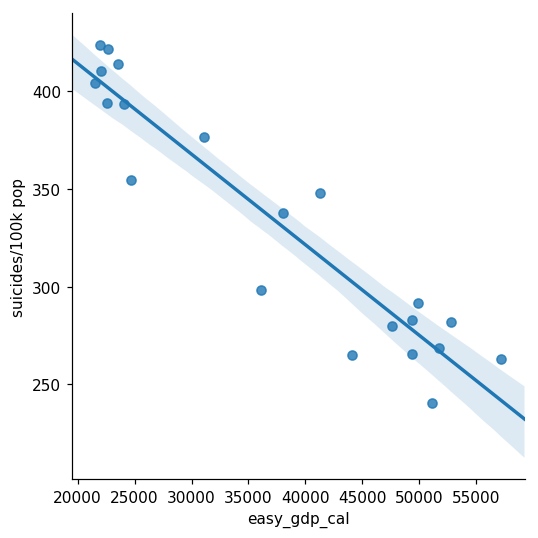

In [19]:
singapore = data[data['country'] == 'Slovenia'].groupby('year').sum()
_ = sns.lmplot('easy_gdp_cal','suicides/100k pop',data = singapore,height = 5)
_.savefig('Oman suicide vs gdp')

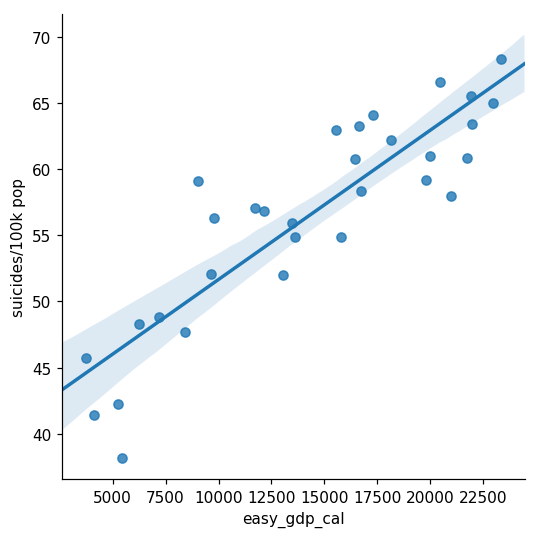

In [20]:
russia = data[data['country'] == 'Mexico'].groupby('year').sum()
_ = sns.lmplot('easy_gdp_cal','suicides/100k pop',data = russia,height = 5)
_.savefig('Mexico suicide vs gdp')

#### Calculate the correlation between GDP and suicide rate

In [8]:
def create_df(country):
    df = data[data['country'] == country].groupby('year').sum()
    return df

def calculate_corr(df):
    return df['easy_gdp_cal'].corr(df['suicides/100k pop'])

correlation = {}
for country in data['country'].unique():
    corr = calculate_corr(create_df(country))
    correlation[country] = corr

li = []
for key,value in correlation.items():
    if value < -0.3:
        li.append(key)
        
        
sad = []
for key,value in correlation.items():
    if value > 0.3:
        sad.append(key)
        
print("""It seems that only {} % of the country shows a decrease in number of suicides due to improvement in living condition.There must be other reason such cultural, war (which should be explainable by low gdp) or various other factors.""".format(round(len(li)/data['country'].nunique() * 100),2))
print()
print("""It seems that only {} % of the country shows an increase in number of suicides due to improvement in living condition.There must be other reason such cultural, war (which should be explainable by low gdp) or various other factors.""".format(round(len(sad)/data['country'].nunique() * 100),2))
print()
print('27 % of countries is neutral')

It seems that only 56 % of the country shows a decrease in number of suicides due to improvement in living condition.There must be other reason such cultural, war (which should be explainable by low gdp) or various other factors.

It seems that only 17 % of the country shows an increase in number of suicides due to improvement in living condition.There must be other reason such cultural, war (which should be explainable by low gdp) or various other factors.

27 % of countries is neutral


#### Creating groups of country for further analysis

In [9]:
neutral = []
for key,value in correlation.items():
    if (key not in sad) & (key not in li):
        neutral.append(key)

#### Plotting correlation plot of country with low correlation plot between GDP and Suicide rate

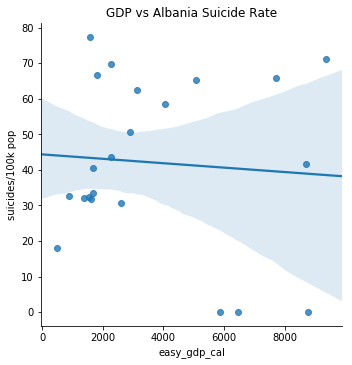

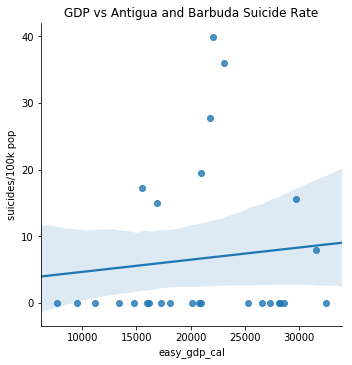

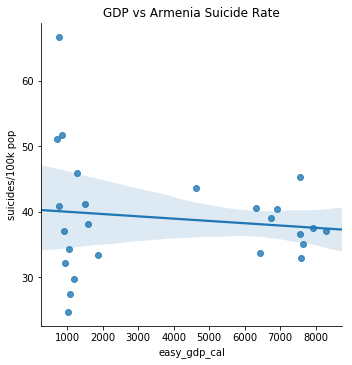

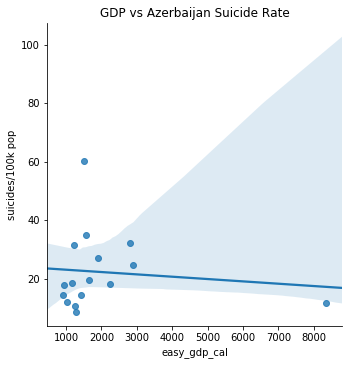

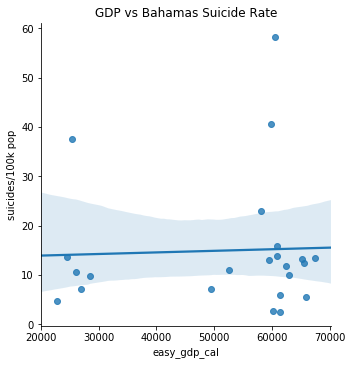

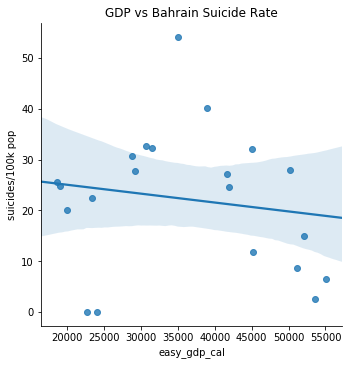

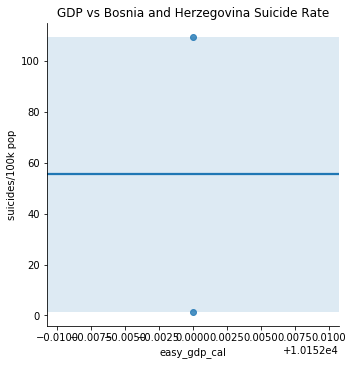

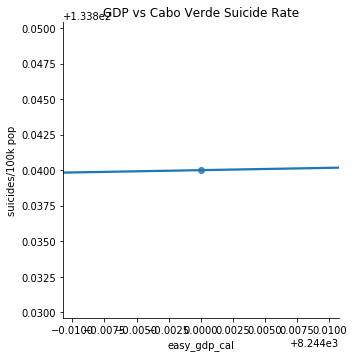

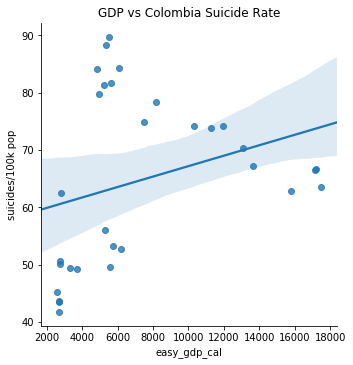

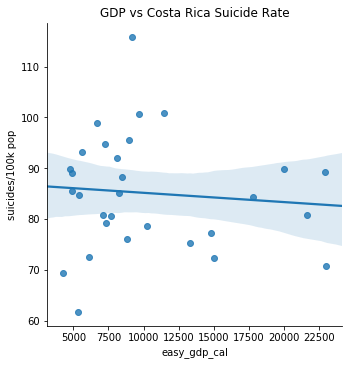

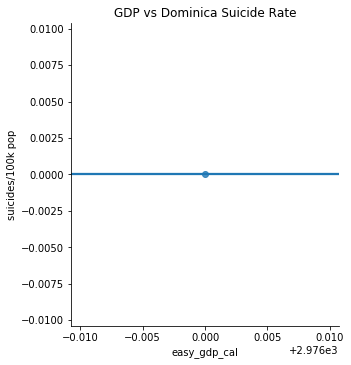

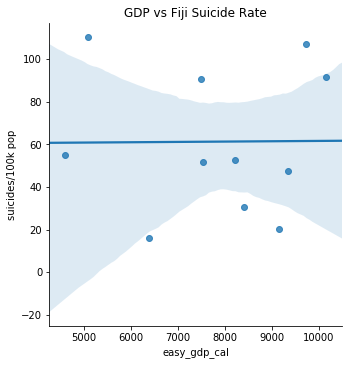

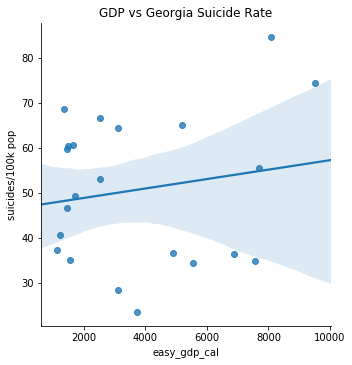

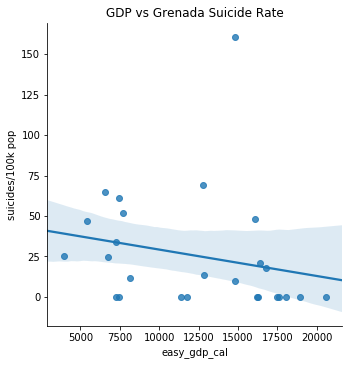

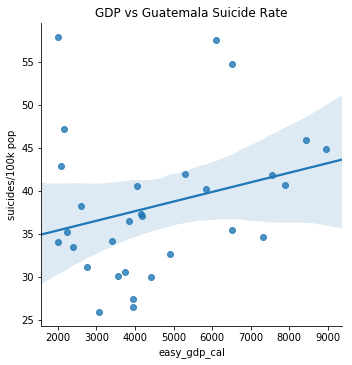

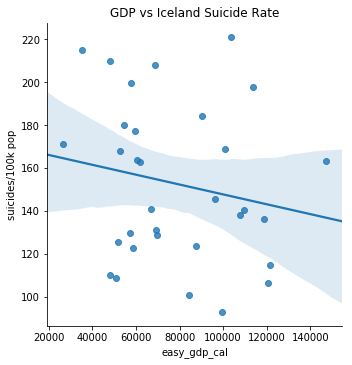

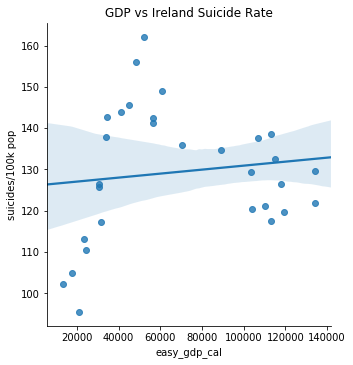

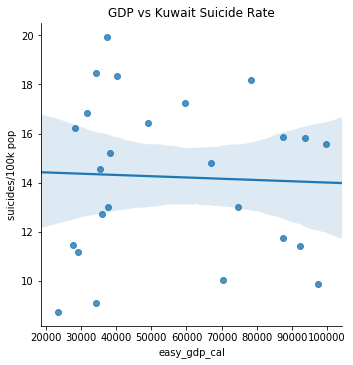

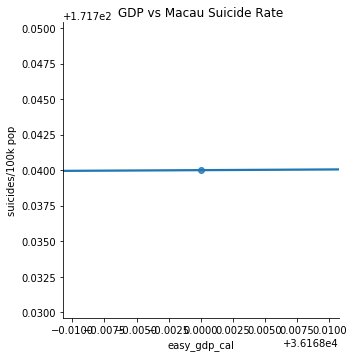

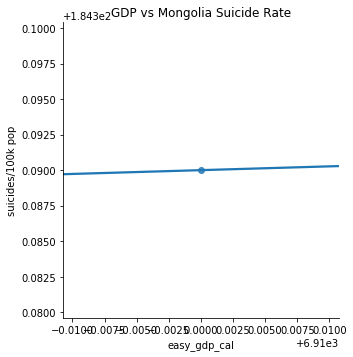

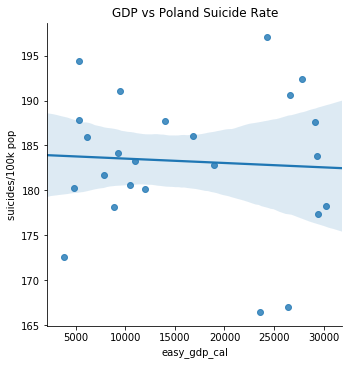

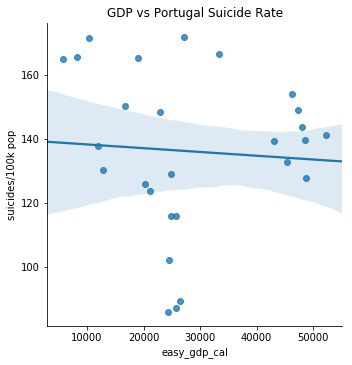

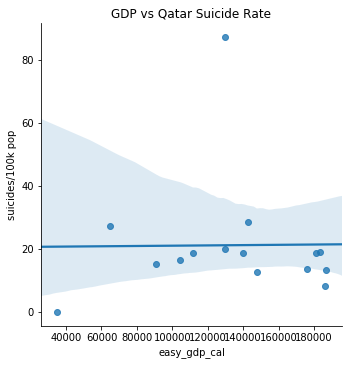

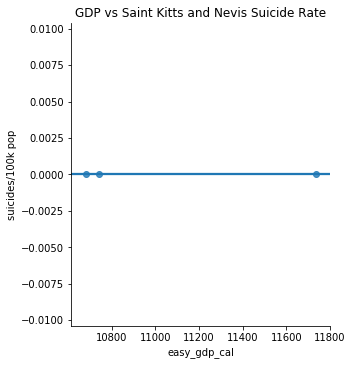

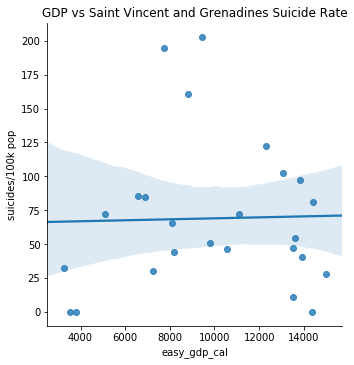

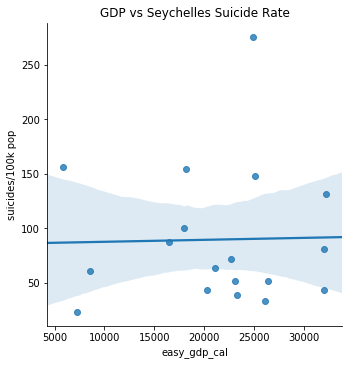

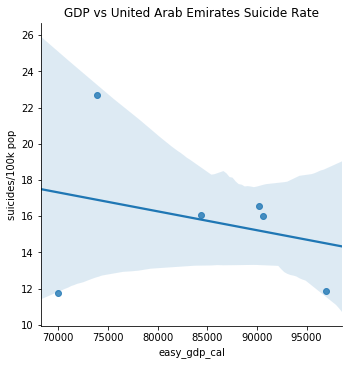

In [21]:
for count in neutral:
    view = data[data['country'] == count].groupby('year').sum()
    _ = sns.lmplot('easy_gdp_cal','suicides/100k pop',data = view,height = 5)
    plt.title('GDP vs {} Suicide Rate'.format(count))
    _.savefig('{} suicide vs gdp'.format(count))

### When do people typically commit suicide ?

Text(0.5, 1.0, 'Age group vs Suicide Rate Per 100k of Population')

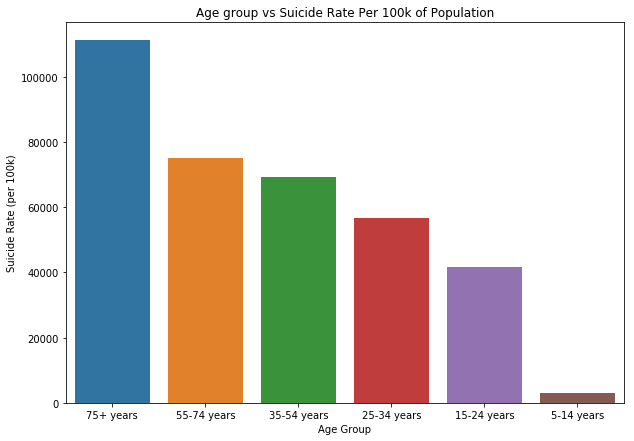

In [22]:
plt.figure(figsize = (10,7))
y = data.groupby('age').sum()['suicides/100k pop'].sort_values(ascending = False)
x = data.groupby('age').sum()['suicides/100k pop'].sort_values(ascending = False).index
sns.barplot(x = x, y = y)
plt.xlabel('Age Group')
plt.ylabel('Suicide Rate (per 100k)')
plt.title('Age group vs Suicide Rate Per 100k of Population')

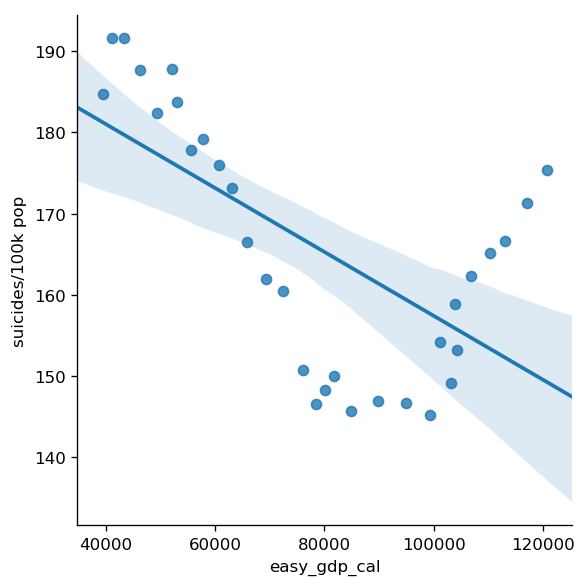

In [49]:
Usa = data[data['country'] == 'United States'].groupby('year').sum()
_ = sns.lmplot('easy_gdp_cal','suicides/100k pop',data = Usa,height = 5)
_.savefig('USA suicide vs gdp')

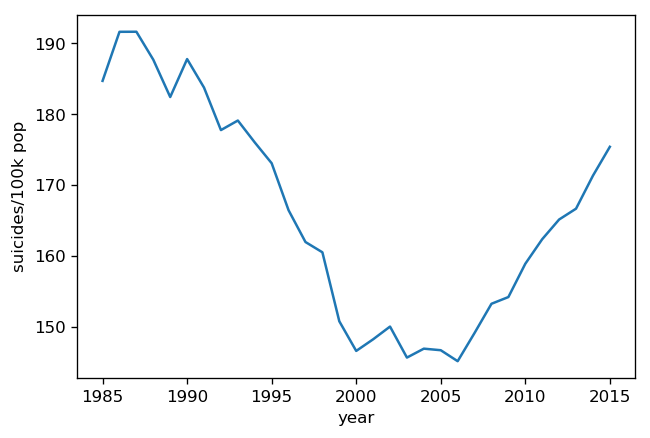

In [54]:
sns.lineplot(Usa.index, Usa['suicides/100k pop'],row)

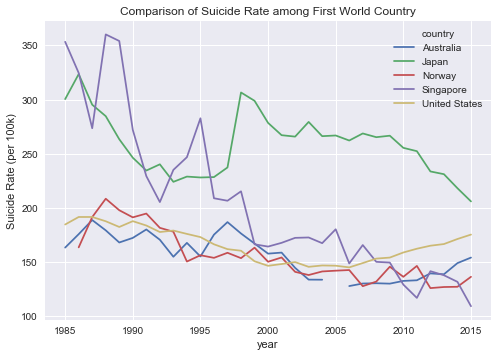

In [23]:
first_world = data[data['country'].isin(['United States', 'Japan','Australia','Norway','Singapore'])].groupby(['country','year']).sum()['suicides/100k pop']
plt.style.use('seaborn')
first_world.unstack().T.plot()
plt.ylabel('Suicide Rate (per 100k)')
plt.title("Comparison of Suicide Rate among First World Country")
plt.show()

### When is the turning point in suicide rate in Unites States ?

In [111]:
Usa['suicides/100k pop'].idxmin()

2006

### Which country has the highest number of suicide across the year and across all age group ?

In [4]:
data.groupby('country').sum()['suicides_no'].sort_values(ascending = False)[:10]

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Name: suicides_no, dtype: int64

In [35]:
data[data['year'] == 2015].groupby('country').mean()['suicides/100k pop'].sort_values(ascending = False)[:5]

country
Republic of Korea    32.428333
Lithuania            32.123333
Uruguay              22.501667
Slovenia             22.067500
Hungary              21.439167
Name: suicides/100k pop, dtype: float64

In [29]:
data_male = data[data['sex'] == 'male'].groupby('country').mean()['suicides/100k pop'].sort_values(ascending = False)

In [33]:
data_male[:10]

country
Lithuania             67.956947
Russian Federation    58.183704
Sri Lanka             55.091667
Belarus               52.757619
Hungary               51.419355
Kazakhstan            50.014038
Latvia                48.775873
Slovenia              45.174206
Estonia               45.056984
Ukraine               44.253393
Name: suicides/100k pop, dtype: float64

In [30]:
data_female = data[data['sex'] == 'female'].groupby('country').mean()['suicides/100k pop'].sort_values(ascending = False)

In [34]:
data_female[:10]

country
Sri Lanka             15.498636
Republic of Korea     14.812527
Hungary               14.103677
Japan                 13.692688
Lithuania             12.874198
Macau                 12.796667
Singapore             12.669355
Russian Federation    11.601049
Kazakhstan            11.008526
Serbia                10.815556
Name: suicides/100k pop, dtype: float64

In [37]:
data.groupby(['sex','age']).mean()['suicides/100k pop']

sex     age        
female  15-24 years     4.328018
        25-34 years     4.573210
        35-54 years     5.916480
        5-14 years      0.462252
        55-74 years     7.123447
        75+ years       9.919802
male    15-24 years    13.566290
        25-34 years    19.800560
        35-54 years    23.978402
        5-14 years      0.777831
        55-74 years    25.187712
        75+ years      37.991017
Name: suicides/100k pop, dtype: float64